In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import welch
from mne.io import read_raw_eeglab
from fooof import FOOOF

# === Define Paths to Folders Containing Group Data ===
group_1_folder = r"C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF"  # Replace with the actual folder path for Group 1
group_2_folder = r"C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG"  # Replace with the actual folder path for Group 2

# Automatically list all .SET files for Group 1 and Group 2
group_1_files = [os.path.join(group_1_folder, f) for f in os.listdir(group_1_folder) if f.endswith('.set')]
group_2_files = [os.path.join(group_2_folder, f) for f in os.listdir(group_2_folder) if f.endswith('.set')]

# === Frequency Range for Welch PSD and Alpha Band ===
ALPHA_RANGE = [8, 12]

# Initialize lists for results
group_1_results = []
group_2_results = []

def process_eeg(file_path):
    """Process an EEG file and extract metrics using FOOOF."""
    # Load EEG data
    eeg_data = read_raw_eeglab(file_path, preload=True)
    data, sfreq = eeg_data.get_data(return_times=False), eeg_data.info['sfreq']
    
    # Average across electrodes
    avg_data = np.mean(data, axis=0)
    
    # Compute Power Spectral Density (PSD)
    freqs, psd = welch(avg_data, sfreq, nperseg=sfreq * 2)  # 2-second window

    # Fit the power spectrum using FOOOF
    fm = FOOOF(peak_width_limits=[1, 12], background_mode='knee')
    fm.fit(freqs, psd)
    
    # Extract alpha peak and background parameters
    alpha_peak = [peak for peak in fm.peak_params_ if ALPHA_RANGE[0] <= peak[0] <= ALPHA_RANGE[1]]
    iaf = alpha_peak[0][0] if alpha_peak else None
    alpha_power = alpha_peak[0][1] if alpha_peak else None
    slope = fm.background_params_[1]  # Slope from 1/f fit
    
    return {
        'iaf': iaf,
        'alpha_power': alpha_power,
        'slope': slope
    }

# Process all files in Group 1
for file in group_1_files:
    result = process_eeg(file)
    result['Group'] = 'Group 1'
    group_1_results.append(result)

# Process all files in Group 2
for file in group_2_files:
    result = process_eeg(file)
    result['Group'] = 'Group 2'
    group_2_results.append(result)

# Combine results into a DataFrame
all_results = pd.DataFrame(group_1_results + group_2_results)

# Save results to a CSV for further use
all_results.to_csv("eeg_results.csv", index=False)

# === Visualization ===

# Plot Alpha Power
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='alpha_power', data=all_results, palette='Set2')
plt.title('Alpha Power Comparison')
plt.ylabel('Alpha Power (log)')
plt.show()

# Plot Individual Alpha Frequency (IAF)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='iaf', data=all_results, palette='Set2')
plt.title('Individual Alpha Frequency (IAF) Comparison')
plt.ylabel('IAF (Hz)')
plt.show()

# Plot 1/f Slope
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='slope', data=all_results, palette='Set2')
plt.title('1/f Slope Comparison')
plt.ylabel('Slope (γ)')
plt.show()


Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_202_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 43645  =      0.000 ...   170.488 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_13652\3384617767.py:28: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  eeg_data = read_raw_eeglab(file_path, preload=True)


TypeError: FOOOF.__init__() got an unexpected keyword argument 'background_mode'

In [2]:
!pip install fooof==<version>


The syntax of the command is incorrect.


In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import welch
from mne.io import read_raw_eeglab
from fooof import FOOOF

# === Define Paths to Folders Containing Group Data ===
group_1_folder = r"C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF"  # Replace with the actual folder path for Group 1
group_2_folder = r"C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG"  # Replace with the actual folder path for Group 2

# Automatically list all .SET files for Group 1 and Group 2
group_1_files = [os.path.join(group_1_folder, f) for f in os.listdir(group_1_folder) if f.endswith('.set')]
group_2_files = [os.path.join(group_2_folder, f) for f in os.listdir(group_2_folder) if f.endswith('.set')]

# === Frequency Range for Welch PSD and Alpha Band ===
ALPHA_RANGE = [8, 12]

# Initialize lists for results
group_1_results = []
group_2_results = []

def process_eeg(file_path):
    """Process an EEG file and extract metrics using FOOOF."""
    # Load EEG data
    eeg_data = read_raw_eeglab(file_path, preload=True)
    data, sfreq = eeg_data.get_data(return_times=False), eeg_data.info['sfreq']
    
    # Average across electrodes
    avg_data = np.mean(data, axis=0)
    
    # Compute Power Spectral Density (PSD)
    freqs, psd = welch(avg_data, sfreq, nperseg=sfreq * 2)  # 2-second window

    # Fit the power spectrum using FOOOF
    fm = FOOOF(peak_width_limits=[1, 12])  # Removed `background_mode`
    fm.fit(freqs, psd)
    
    # Extract alpha peak and background parameters
    alpha_peak = [peak for peak in fm.peak_params_ if ALPHA_RANGE[0] <= peak[0] <= ALPHA_RANGE[1]]
    iaf = alpha_peak[0][0] if alpha_peak else None
    alpha_power = alpha_peak[0][1] if alpha_peak else None

    # Extract the 1/f slope (typically the second value in the background parameters)
    slope = fm.background_params_[1] if fm.background_params_ else None
    
    return {
        'iaf': iaf,
        'alpha_power': alpha_power,
        'slope': slope
    }
# Process all files in Group 1
for file in group_1_files:
    result = process_eeg(file)
    result['Group'] = 'Group 1'
    group_1_results.append(result)

# Process all files in Group 2
for file in group_2_files:
    result = process_eeg(file)
    result['Group'] = 'Group 2'
    group_2_results.append(result)

# Combine results into a DataFrame
all_results = pd.DataFrame(group_1_results + group_2_results)

# Save results to a CSV for further use
all_results.to_csv("eeg_results.csv", index=False)

# === Visualization ===

# Plot Alpha Power
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='alpha_power', data=all_results, palette='Set2')
plt.title('Alpha Power Comparison')
plt.ylabel('Alpha Power (log)')
plt.show()

# Plot Individual Alpha Frequency (IAF)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='iaf', data=all_results, palette='Set2')
plt.title('Individual Alpha Frequency (IAF) Comparison')
plt.ylabel('IAF (Hz)')
plt.show()

# Plot 1/f Slope
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='slope', data=all_results, palette='Set2')
plt.title('1/f Slope Comparison')
plt.ylabel('Slope (γ)')
plt.show()


Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_201_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 44388  =      0.000 ...   173.391 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\2347169215.py:28: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  eeg_data = read_raw_eeglab(file_path, preload=True)


AttributeError: 'FOOOF' object has no attribute 'background_params_'

In [11]:
!pip install mne
!pip install fooof


Reading C:\Users\donat\Pratybos naujas\NCF_201_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 44388  =      0.000 ...   173.391 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Alpha Peak: [[ 10.86539549   1.3284169    2.15050519]
 [ 26.93262369   1.86807566   9.83737731]
 [ 36.71684692   2.79423414   7.53972162]
 [ 42.1174052    3.3676905    4.09469319]
 [ 44.92844446   3.6813127    1.94873079]
 [118.79951914   2.11415157  12.        ]]
1/f Slope (Exponent): 8.739770569164115


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\880308416.py:14: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)


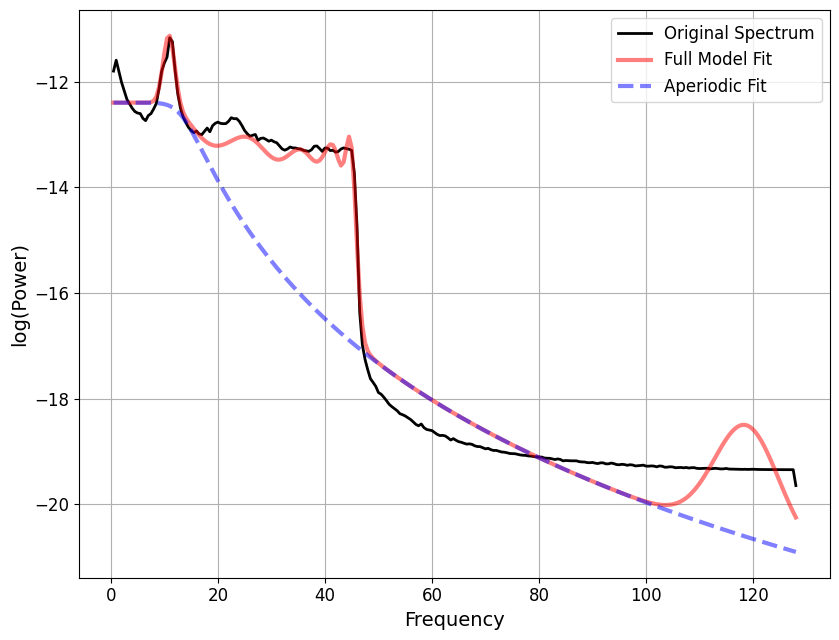

In [20]:
import mne
from fooof import FOOOF
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
import os

# Correct file path using raw string format
file_path = r'C:\Users\donat\Pratybos naujas\NCF_201_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set'

# Check if the file exists
if os.path.exists(file_path):
    # Load the EEG data using MNE (for .set format)
    raw_data = mne.io.read_raw_eeglab(file_path, preload=True)

    # Extract data and sampling frequency
    eeg_data = raw_data.get_data()
    sfreq = raw_data.info['sfreq']

    # Compute the Power Spectral Density (PSD)
    avg_data = eeg_data.mean(axis=0)
    frequencies, psd = welch(avg_data, fs=sfreq, nperseg=sfreq*2)  # 2-second window

    # Initialize FOOOF
    fm = FOOOF(peak_width_limits=[1, 12], aperiodic_mode='knee')

    # Fit the FOOOF model
    fm.fit(frequencies, psd)

    # Plot the fit
    fm.plot()

    # Extract the alpha peak
    alpha_peak = fm.get_params('peak')

    # Extract the 1/f slope (exponent)
    slope = fm.get_params('aperiodic', 'exponent')

    print("Alpha Peak:", alpha_peak)
    print("1/f Slope (Exponent):", slope)
else:
    print("File does not exist at the given path.")


In [21]:
import mne
from fooof import FOOOF
import numpy as np
import os
import pandas as pd
from scipy.signal import welch
import matplotlib.pyplot as plt

# Define the path where your EEG .set files are stored
data_dir_group_1 = r'C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF'  # Change this to the correct directory for Group 1
data_dir_group_2 = r'C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG'  # Change this to the correct directory for Group 2

# List all the .set files in the directories for each group
file_list_group_1 = [f for f in os.listdir(data_dir_group_1) if f.endswith('.set')]
file_list_group_2 = [f for f in os.listdir(data_dir_group_2) if f.endswith('.set')]

# Initialize empty lists to store results
group_1_results = []
group_2_results = []

# Function to check if the fitting is correct
def check_fit_quality(fm):
    # You can use the residuals or other criteria to flag bad fits
    # Here we're using a simple check: if the residuals are too high
    residuals = fm.get_params('aperiodic', 'residual')
    return residuals < 0.1  # Threshold for "good" fit (you can adjust this)

# Process files for Group 1
for file_name in file_list_group_1:
    file_path = os.path.join(data_dir_group_1, file_name)
    if os.path.exists(file_path):
        try:
            # Load the EEG data
            raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
            eeg_data = raw_data.get_data()
            sfreq = raw_data.info['sfreq']

            # Compute Power Spectral Density (PSD)
            avg_data = eeg_data.mean(axis=0)
            frequencies, psd = welch(avg_data, fs=sfreq, nperseg=sfreq*2)  # 2-second window

            # Initialize and fit the FOOOF model
            fm = FOOOF(peak_width_limits=[1, 12], aperiodic_mode='knee')
            fm.fit(frequencies, psd)

            # Check if the fit is good
            if check_fit_quality(fm):
                # Extract alpha peak and 1/f slope
                alpha_peak = fm.get_params('peak')
                slope = fm.get_params('aperiodic', 'exponent')

                group_1_results.append({
                    'File': file_name,
                    'Alpha Peak': alpha_peak,
                    '1/f Slope': slope,
                    'Fit Quality': 'Good'
                })
            else:
                group_1_results.append({
                    'File': file_name,
                    'Alpha Peak': None,
                    '1/f Slope': None,
                    'Fit Quality': 'Poor'
                })
        except Exception as e:
            print(f"Error processing file {file_name}: {e}")
    else:
        print(f"File not found: {file_name}")

# Process files for Group 2
for file_name in file_list_group_2:
    file_path = os.path.join(data_dir_group_2, file_name)
    if os.path.exists(file_path):
        try:
            # Load the EEG data
            raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
            eeg_data = raw_data.get_data()
            sfreq = raw_data.info['sfreq']

            # Compute Power Spectral Density (PSD)
            avg_data = eeg_data.mean(axis=0)
            frequencies, psd = welch(avg_data, fs=sfreq, nperseg=sfreq*2)  # 2-second window

            # Initialize and fit the FOOOF model
            fm = FOOOF(peak_width_limits=[1, 12], aperiodic_mode='knee')
            fm.fit(frequencies, psd)

            # Check if the fit is good
            if check_fit_quality(fm):
                # Extract alpha peak and 1/f slope
                alpha_peak = fm.get_params('peak')
                slope = fm.get_params('aperiodic', 'exponent')

                group_2_results.append({
                    'File': file_name,
                    'Alpha Peak': alpha_peak,
                    '1/f Slope': slope,
                    'Fit Quality': 'Good'
                })
            else:
                group_2_results.append({
                    'File': file_name,
                    'Alpha Peak': None,
                    '1/f Slope': None,
                    'Fit Quality': 'Poor'
                })
        except Exception as e:
            print(f"Error processing file {file_name}: {e}")
    else:
        print(f"File not found: {file_name}")

# Convert results for both groups to DataFrames
group_1_df = pd.DataFrame(group_1_results)
group_2_df = pd.DataFrame(group_2_results)

# Save the results to CSV files for each group
group_1_df.to_csv('group_1_results.csv', index=False)
group_2_df.to_csv('group_2_results.csv', index=False)

# Calculate the average alpha peak and 1/f slope for each group (excluding bad fits)
group_1_avg = group_1_df[group_1_df['Fit Quality'] == 'Good'][['Alpha Peak', '1/f Slope']].mean()
group_2_avg = group_2_df[group_2_df['Fit Quality'] == 'Good'][['Alpha Peak', '1/f Slope']].mean()

print("Group 1 Averages:")
print(group_1_avg)

print("Group 2 Averages:")
print(group_2_avg)

# Plotting the averages for both groups
plt.figure(figsize=(10, 6))

# Plot Alpha Peaks
plt.subplot(1, 2, 1)
plt.bar(['Group 1', 'Group 2'], [group_1_avg['Alpha Peak'], group_2_avg['Alpha Peak']])
plt.ylabel('Alpha Peak Frequency (Hz)')
plt.title('Average Alpha Peak Frequency')

# Plot 1/f Slope
plt.subplot(1, 2, 2)
plt.bar(['Group 1', 'Group 2'], [group_1_avg['1/f Slope'], group_2_avg['1/f Slope']])
plt.ylabel('1/f Slope')
plt.title('Average 1/f Slope')

# Show the plots
plt.tight_layout()
plt.show()


Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_202_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 43645  =      0.000 ...   170.488 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_202_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_204_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 46182  =      0.000 ...   180.398 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_204_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_205_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 41040  =      0.000 ...   160.312 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_205_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_206_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 38087  =      0.000 ...   148.777 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_206_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_207_R2256_imp_ch_flt1-45_flt50__rejectedarte_ICA_prep.fdt
Reading 0 ... 43020  =      0.000 ...   168.047 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_207_R2256_imp_ch_flt1-45_flt50__rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_209_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 34802  =      0.000 ...   135.945 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_209_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_210_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 39445  =      0.000 ...   154.082 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_210_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_211_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 40889  =      0.000 ...   159.723 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_211_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_212_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 54504  =      0.000 ...   212.906 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_212_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_213_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 42572  =      0.000 ...   166.297 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_213_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_215_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 43886  =      0.000 ...   171.430 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_215_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_217_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 43940  =      0.000 ...   171.641 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_217_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_220_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 46157  =      0.000 ...   180.301 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_220_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_221_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 43804  =      0.000 ...   171.109 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_221_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_222_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 49486  =      0.000 ...   193.305 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_222_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_223_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 46058  =      0.000 ...   179.914 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_223_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_224_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 48345  =      0.000 ...   188.848 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_224_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_225_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 61030  =      0.000 ...   238.398 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_225_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_226_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 48941  =      0.000 ...   191.176 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_226_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_227_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 42997  =      0.000 ...   167.957 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)


Error processing file NCF_227_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_228_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 48056  =      0.000 ...   187.719 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_228_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_229_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 44465  =      0.000 ...   173.691 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_229_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_230_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 45094  =      0.000 ...   176.148 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_230_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_231_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 47242  =      0.000 ...   184.539 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_231_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_232_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 46513  =      0.000 ...   181.691 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_232_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_233_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 45744  =      0.000 ...   178.688 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_233_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_234_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 47126  =      0.000 ...   184.086 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_234_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_235_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 46926  =      0.000 ...   183.305 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_235_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_236_R2256_imp_ch_flt1-45_flt50_ch_rejectedarte_ICA_prep.fdt
Reading 0 ... 41546  =      0.000 ...   162.289 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_236_R2256_imp_ch_flt1-45_flt50_ch_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCF\NCF_238_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 46948  =      0.000 ...   183.391 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:34: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCF_238_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_301_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.fdt
Reading 0 ... 43191  =      0.000 ...   168.715 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)


Error processing file NCG_301_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_302_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 43049  =      0.000 ...   168.160 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_302_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_303_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.fdt
Reading 0 ... 45283  =      0.000 ...   176.887 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_303_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_303_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 45283  =      0.000 ...   176.887 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_303_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_304_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 43807  =      0.000 ...   171.121 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_304_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_305_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 41315  =      0.000 ...   161.387 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_305_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_306_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr1_ICA_prep.fdt
Reading 0 ... 45327  =      0.000 ...   177.059 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_306_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr1_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_306_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.fdt
Reading 0 ... 45327  =      0.000 ...   177.059 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_306_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_306_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 45327  =      0.000 ...   177.059 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_306_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_307_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.fdt
Reading 0 ... 46815  =      0.000 ...   182.871 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_307_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_308_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.fdt
Reading 0 ... 43241  =      0.000 ...   168.910 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_308_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_309_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.fdt
Reading 0 ... 46391  =      0.000 ...   181.215 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_309_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_310_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 43285  =      0.000 ...   169.082 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)


Error processing file NCG_310_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_311_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 46515  =      0.000 ...   181.699 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_311_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_312_ER2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.fdt
Reading 0 ... 48703  =      0.000 ...   190.246 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_312_ER2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_313_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.fdt
Reading 0 ... 50105  =      0.000 ...   195.723 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_313_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_314_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.fdt
Reading 0 ... 68688  =      0.000 ...   268.312 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_314_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_315_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.fdt
Reading 0 ... 46114  =      0.000 ...   180.133 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_315_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_316_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.fdt
Reading 0 ... 47301  =      0.000 ...   184.770 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_316_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_317_R2256_imp_ch_flt1-45_flt50_

C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)


Reading 0 ... 46300  =      0.000 ...   180.859 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_317_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_318_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.fdt
Reading 0 ... 46848  =      0.000 ...   183.000 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)


Error processing file NCG_318_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_319_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.fdt
Reading 0 ... 44383  =      0.000 ...   173.371 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_319_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_320_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.fdt
Reading 0 ... 47300  =      0.000 ...   184.766 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_320_R2256_imp_ch_flt1-45_flt50_rejectedarte_chr_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_321_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)


Reading 0 ... 46902  =      0.000 ...   183.211 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_321_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_322_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 49947  =      0.000 ...   195.105 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_322_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_323_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)


Reading 0 ... 44989  =      0.000 ...   175.738 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_323_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_324_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 51417  =      0.000 ...   200.848 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_324_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_325_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 52459  =      0.000 ...   204.918 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_325_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_326_R2256_imp_ch_flt1-45_flt50_rejecetedarte_ICA_prep.fdt
Reading 0 ... 45771  =      0.000 ...   178.793 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_326_R2256_imp_ch_flt1-45_flt50_rejecetedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_327_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_p

C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)


Reading 0 ... 48278  =      0.000 ...   188.586 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_327_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_328_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 47530  =      0.000 ...   185.664 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_328_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_329_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)


Reading 0 ... 47742  =      0.000 ...   186.492 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_329_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_330_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 48818  =      0.000 ...   190.695 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_330_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_331_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 46687  =      0.000 ...   182.371 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_331_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_332_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 48245  =      0.000 ...   188.457 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_332_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_333_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 46861  =      0.000 ...   183.051 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_333_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_334_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 53461  =      0.000 ...   208.832 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_334_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_335_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_pre

C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)


Reading 0 ... 47723  =      0.000 ...   186.418 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_335_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_336_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 48146  =      0.000 ...   188.070 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_336_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'
Reading C:\Users\donat\OneDrive\Stalinis kompiuteris\data\NCG\NCG_337_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.fdt
Reading 0 ... 46596  =      0.000 ...   182.016 secs...

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Error processing file NCG_337_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set: 'residual'


C:\Users\donat\AppData\Local\Temp\ipykernel_9024\3852264803.py:76: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = mne.io.read_raw_eeglab(file_path, preload=True)


KeyError: 'Fit Quality'